In [29]:
# setting up libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm 
import statistics
from sklearn.metrics import matthews_corrcoef
from scipy.stats import chi2_contingency
import math
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

%matplotlib inline

<ipython-input-29-8cc2645e214e>:20: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [30]:
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

import re
import numpy as np
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)  

In [31]:
#Importing necessary libraries
import re
import nltk
import spacy
import string

# Reading the dataset
df = pd.read_csv("cleaned_abstracts_update.csv")
df['size_new']=df['abstract_new'].str.len()
print(df.shape)
df.sample(3)

(209, 4)


,abstract,size,abstract_new,size_new
182,"Charles, Rhys G. (2018) Assessment and Exploitation of the Inherent Value of Waste Electrical and Electronic This item is brought to you by Swansea University. Any person downloading material is agreeing to abide by the terms of the repository licence: copies of full text items may be used or reproduced in any format or medium, without prior permission for personal research or study, educational or non-commercial purposes only. The copyright for any work remains with the original author unless otherwise specified. The full-text must not be sold in any format or medium without the formal permission of the copyright holder. Permission for multiple reproductions should be obtained from the original author. Authors are personally responsible for adhering to copyright and publisher restrictions when uploading content to the repository.",842,charl ray assess exploit inher valu wast electr electron item bring swansea univers person download materi agre abid term depositor licenc copi full text item may use reproduc format medium without prior permiss person research studi educ noncommerci purpos copyright work remain origin author unless otherwis specifi fullest must sell format medium without formal permiss copyright holder permiss multipl reproduct obtain origin author author person respons adher copyright publish restrict unload content depositor,516
148,"Currently the crime of human trafficking became the third international crime after crime of drug trafficking and arms trafficking. Human trafficking has become a business with billions of dollars each year. Approximately 60-80% of victims of human trafficking for purposes of sexual exploitation. Russia as a country that stands out in particular the problem of human trafficking for sexual exploitation. Year 2003-2010 in Russia rise and fall rate phenomenon of human trafficking victims. Factors driving this crime in Russia is the Russian post-Soviet economic instability, unemployment, poverty, instability in some countries of former Soviet Union, ethnic conflict and corruption, organized crime groups as a facilitator and pull factors in the destination country (market demand for sex). Russia's efforts to combat human trafficking is to strengthen legislation to prevent human trafficking in Russia, build the domestic economy, and cooperate with other countries, NGOs and the International Organization for preventing and combating human trafficking crimes.",1067,current crime human traffic becom third intern crime crime drug traffic arm traffic human traffic becom busi billion dollar year approxim victim human traffic purpos sexual exploit russia stand particular problem human traffic sexual exploit year russia rise fall rate phenomenon human traffic victim factor drive crime russia russian postsoviet inabl unemploy poverti inabl former soviet union ethnic conflict corrupt organ crime group facilit pull factor destin market demand sex russian effort combat human traffic strengthen legisl prevent human traffic russia build domest cooper no intern organ prevent combat human traffic crime,635
2,"in the aviation sector has been increased sharply in recent years. Among the various clean power sources, energy obtained from hydrogen is considered the future for energy generation in the aviation industry due to its cleanness and abundance. This paper aims to give an overview of the potential aviation applications where hydrogen and fuel cell technology can be used. Also, the major challenges that limit the wide adoption of hydrogen technology in aviation are highlighted and future research prospects are identified.",524,aviat sector increas sharpli recent year among variou clean power sourc energi obtain hydrogen consid futur energi gener aviat industri due clear abund aim give overview potenti aviat applic hydrogen cell technolog use also major challeng limit wide adopt hydrogen technolog aviat highlight futur research prospect identifi,323


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   abstract      209 non-null    object
 1   size          209 non-null    int64 
 2   abstract_new  209 non-null    object
 3   size_new      209 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.7+ KB


In [33]:
# Tokenization
from nltk.tokenize import word_tokenize

df['abstract_new_token'] = df.apply(lambda row: word_tokenize(row['abstract_new']), axis = 1)

In [34]:
df.sample(3)

,abstract,size,abstract_new,size_new,abstract_new_token
13,"This article investigates perspectives that have been proposed as reasons both for and against fossil fuel divestment (FFD), paying special attention to the decisions that universities make concerning investments in their endowment portfolios. Arguments that have been advanced against FFD include its supposedly lower financial returns, lack of direct control over investments, reliance on financial advisors, high transaction costs, the need for market index funds that include the stocks of fossil fuel rfims, and the institution's dfiuciary duty to increase returns. Arguments that have been advanced in favor of FFD include satisfactory returns from fossil fuel-free portfolios, risk reduction, the over-pricing of fossil fuel rfims, improved portfolio diversicfiation, and the need to align investing behavior with the institution's values, mission, and role in society.",876,articl investig perspect propos reason fossil invest ff pay special attent decis univers make concern invest endow portfolio argument advanc ff includ supposedli lower financi return lack direct control invest relianc financi advis high transact cost need market index fund includ stock fossil room institut dfiuciari duti increas return argument advanc favor ff includ satisfactori return fossil fuelfre portfolio risk reduct overrid fossil room improv portfolio diversif need align invest behavior institut valu mission role societi,534,"[articl, investig, perspect, propos, reason, fossil, invest, ff, pay, special, attent, decis, univers, make, concern, invest, endow, portfolio, argument, advanc, ff, includ, supposedli, lower, financi, return, lack, direct, control, invest, relianc, financi, advis, high, transact, cost, need, market, index, fund, includ, stock, fossil, room, institut, dfiuciari, duti, increas, return, argument, advanc, favor, ff, includ, satisfactori, return, fossil, fuelfre, portfolio, risk, reduct, overrid, fossil, room, improv, portfolio, diversif, need, align, invest, behavior, institut, valu, mission, role, societi]"
37,"Fiscal sustainability concerns in Africa have increased recently following heightened fiscal vulnerabilities attributed to external factors including falling commodity prices that weakened fiscal revenues and growth, particularly for commodity-exporting African countries. To entrench fiscal sustainability, countries need to strengthen domestic resource mobilization and improve public investment management. Consequently, measures to increase tax revenue collections, savings mobilization and efficiency of public spending are critical. The G20 should support debt reporting, data harmonisation, tax compliance, combating illicit financial flows and developing effective debt resolution frameworks.",700,fiscal sustain concern africa increas recent follow heighten fiscal vulner attribut extern factor includ fall commod price weaken fiscal revenu particularli commodityexport african entrench fiscal sustain need strengthen domest resourc mobil improv public invest manag consequ measur increas tax revenu collect save mobil effici public spend critic support debt report data harmonis tax complianc combat illicit financi flow effect debt resolut framework,454,"[fiscal, sustain, concern, africa, increas, recent, follow, heighten, fiscal, vulner, attribut, extern, factor, includ, fall, commod, price, weaken, fiscal, revenu, particularli, commodityexport, african, entrench, fiscal, sustain, need, strengthen, domest, resourc, mobil, improv, public, invest, manag, consequ, measur, increas, tax, revenu, collect, save, mobil, effici, public, spend, critic, support, debt, report, data, harmonis, tax, complianc, combat, illicit, financi, flow, effect, debt, resolut, framework]"
67,"This is an informal guide to help with acknowledging culture change when opening a dialogue between Native Americans and non-Native Americans. eTh list of “Dos” and “Don'ts” have been assembled by the Native Amer

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#17howtofindtheoptimalnumberoftopicsforlda

In [35]:
abs_words = list(df['abstract_new_token'])
print(abs_words[:1])

[['industri', 'aviat', 'industri', 'grow', 'rapidli', 'meet', 'requir', 'increas', 'applic', 'aviat', 'sector', 'increas', 'sharpli', 'recent', 'year', 'among', 'variou', 'clean', 'power', 'sourc', 'energi', 'obtain', 'hydrogen', 'consid', 'futur', 'energi', 'gener', 'aviat', 'industri', 'due', 'clear', 'abund', 'aim', 'give', 'overview', 'potenti', 'aviat', 'applic', 'hydrogen', 'cell']]


In [36]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(abs_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[abs_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[abs_words[0]]])

['industri', 'aviat', 'industri', 'grow', 'rapidli', 'meet', 'requir', 'increas', 'applic', 'aviat', 'sector', 'increas', 'sharpli', 'recent', 'year', 'among', 'variou', 'clean', 'power', 'sourc', 'energi', 'obtain', 'hydrogen', 'consid', 'futur', 'energi', 'gener', 'aviat', 'industri', 'due', 'clear', 'abund', 'aim', 'give', 'overview', 'potenti', 'aviat', 'applic', 'hydrogen_cell']


In [37]:
print(trigram_mod[bigram_mod[abs_words[1]]])

['statut', 'interpret', 'act', 'appli', 'interpret', 'fluidis', 'chair', 'riderless', 'briquett', 'manufactur', 'nation', 'coal', 'govern', 'juli', 'gener', 'purport', 'clean', 'air', 'act', 'make', 'offenc', 'emit', 'smoke', 'build', 'smoke', 'control', 'area', 'unless', 'show', 'theseregul', 'declar', 'mention', 'therein', 'tiireepencb', 'net']


In [38]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [39]:
# Form Bigrams
abs_words_bigrams = make_bigrams(abs_words)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
abs_words_bigrams_lemm = lemmatization(abs_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(abs_words_bigrams_lemm[:1])

[['sector', 'increa', 'recent', 'year', 'power', 'sourc', 'obtain', 'due', 'give']]


In [40]:
# Form Trigrams
abs_words_trigrams = make_trigrams(abs_words)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
abs_words_trigrams_lemm = lemmatization(abs_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(abs_words_trigrams_lemm[:1])

[['sector', 'increa', 'recent', 'year', 'power', 'sourc', 'obtain', 'due', 'give']]


# Bigram

In [41]:
# (1) Create Dictionary
id2word = corpora.Dictionary(abs_words_bigrams_lemm)

# (2) Create Corpus
texts = abs_words_bigrams_lemm

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]]


In [43]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('due', 1),
  ('give', 1),
  ('increa', 1),
  ('obtain', 1),
  ('power', 1),
  ('recent', 1),
  ('sector', 1),
  ('sourc', 1),
  ('year', 1)]]

# Find the optimal number of topics for LDA

In [44]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [45]:
# Can take a long time to run.
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, 
                                                        texts=abs_words_bigrams_lemm, start=2, limit=40, step=6)

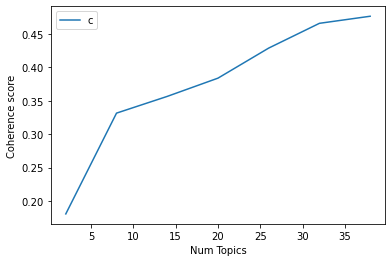

In [46]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [47]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.1805
Num Topics = 8  has Coherence Value of 0.3314
Num Topics = 14  has Coherence Value of 0.3565
Num Topics = 20  has Coherence Value of 0.3838
Num Topics = 26  has Coherence Value of 0.4288
Num Topics = 32  has Coherence Value of 0.4659
Num Topics = 38  has Coherence Value of 0.4765


In [48]:
# Select the model and print the topics
optimal_model = model_list[1] # ------- choose 8!
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=5))

[(0,
  '0.086*"feel" + 0.058*"clean" + 0.029*"household" + 0.025*"import" + '
  '0.024*"environment"'),
 (1,
  '0.038*"govern" + 0.033*"make" + 0.027*"avail" + 0.019*"public" + '
  '0.019*"station"'),
 (2,
  '0.041*"flow" + 0.038*"illicit" + 0.033*"differ" + 0.028*"gener" + '
  '0.027*"impact"'),
 (3,
  '0.062*"global" + 0.060*"product" + 0.052*"trade" + 0.038*"nation" + '
  '0.038*"effect"'),
 (4,
  '0.087*"traffic" + 0.062*"human" + 0.025*"author" + 0.024*"factor" + '
  '0.023*"form"'),
 (5,
  '0.056*"educ" + 0.042*"system" + 0.028*"concept" + 0.025*"process" + '
  '0.024*"understand"'),
 (6,
  '0.045*"fossil" + 0.040*"increa" + 0.026*"high" + 0.025*"low" + '
  '0.024*"produc"'),
 (7,
  '0.047*"model" + 0.038*"sustain" + 0.028*"market" + 0.027*"woman" + '
  '0.026*"term"')]


In [49]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [50]:
# Print the Keyword in the 8 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.028*"discour" + 0.014*"contradict" + 0.014*"make" + 0.014*"propos" + '
  '0.012*"deforest" + 0.012*"hunger" + 0.012*"myth" + 0.012*"perver" + '
  '0.012*"secondgener" + 0.012*"corner"'),
 (1,
  '0.078*"traffic" + 0.070*"human" + 0.035*"domest" + 0.017*"crime" + '
  '0.017*"goal" + 0.015*"relianc" + 0.014*"trade" + 0.009*"dom" + '
  '0.009*"victim" + 0.009*"practic"'),
 (2,
  '0.027*"govern" + 0.027*"global" + 0.025*"form" + 0.020*"sustain" + '
  '0.020*"intern" + 0.018*"moral" + 0.017*"implement" + 0.017*"concept" + '
  '0.016*"factor" + 0.014*"state"'),
 (3,
  '0.031*"govern" + 0.028*"invest" + 0.022*"gap" + 0.019*"health" + '
  '0.018*"illicit" + 0.018*"flow" + 0.016*"would" + 0.016*"total" + '
  '0.013*"spend" + 0.013*"present"'),
 (4,
  '0.026*"trade" + 0.020*"pose" + 0.017*"feel" + 0.014*"reach" + '
  '0.014*"increa" + 0.014*"environment" + 0.013*"implement" + 0.012*"object" + '
  '0.012*"function" + 0.012*"bring"'),
 (5,
  '0.035*"feel" + 0.035*"clean" + 0.021*"cook" + 

In [51]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=abs_words_bigrams_lemm, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.306244000123383

Coherence Score:  0.3752634847250601


In [52]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/Users/djoko/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.096803  0.059410  1       1        19.405383
3     -0.246331 -0.130928  2       1        13.856224
6     -0.094074  0.200480  3       1        13.320367
5      0.201353 -0.044116  4       1        13.289803
4      0.110002  0.005464  5       1        12.310033
7      0.065133  0.123229  6       1        12.289673
0      0.039576 -0.155696  7       1        7.843181 
1      0.021145 -0.057843  8       1        7.685336 , topic_info=                  Term        Freq       Total Category  logprob  loglift
284   product           136.000000  136.000000  Default  30.0000  30.0000
230   traffic           66.000000   66.000000   Default  29.0000  29.0000
219   human             59.000000   59.000000   Default  28.0000  28.0000
352   gross_dom         74.000000   74.000000   Default  27.0000  27.0000
98    fossil            59.000000   59.000000   Default  26.0000  26.0000
11    govern            107.000000  107.000000  Default  25.0000  25.0000
97    feel              108.000000  108.000000  Default  24.0000  24.0000
90    clean             65.000000   65.000000   Default  23.0000  23.0000
99    high              73.000000   73.000000   Default  22.0000  22.0000
1155  domest            30.000000   30.000000   Default  21.0000  21.0000
280   form              59.000000   59.000000   Default  20.0000  20.0000
566   spread            36.000000   36.000000   Default  19.0000  19.0000
18    also              79.000000   79.000000   Default  18.0000  18.0000
299   invest            47.000000   47.000000   Default  17.0000  17.0000
48    trade             54.000000   54.000000   Default  16.0000  16.0000
109   sustain           44.000000   44.000000   Default  15.0000  15.0000
744   discour           25.000000   25.000000   Default  14.0000  14.0000
802   cook              32.000000   32.000000   Default  13.0000  13.0000
189   gap               39.000000   39.000000   Default  12.0000  12.0000
125   implement         53.000000   53.000000   Default  11.0000  11.0000
194   intern            45.000000   45.000000   Default  10.0000  10.0000
784   moral             38.000000   38.000000   Default  9.0000   9.0000 
378   global            105.000000  105.000000  Default  8.0000   8.0000 
564   pose              27.000000   27.000000   Default  7.0000   7.0000 
126   import            44.000000   44.000000   Default  6.0000   6.0000 
238   illicit           28.000000   28.000000   Default  5.0000   5.0000 
833   posit             30.000000   30.000000   Default  4.0000   4.0000 
806   heat              27.000000   27.000000   Default  3.0000   3.0000 
406   health            34.000000   34.000000   Default  2.0000   2.0000 
542   concept           38.000000   38.000000   Default  1.0000   1.0000 
784   moral             37.941544   38.841543   Topic1  -4.0281   1.6162 
109   sustain           43.673358   44.825195   Topic1  -3.8874   1.6136 
27    wide              24.582139   25.416953   Topic1  -4.4621   1.6062 
722   framework         22.231866   23.066350   Topic1  -4.5626   1.6028 
526   crisi             23.150334   24.057387   Topic1  -4.5221   1.6012 
188   factor            33.218620   34.778666   Topic1  -4.1610   1.5937 
556   facilit           13.622516   14.457043   Topic1  -5.0524   1.5802 
1003  consider          13.313921   14.148332   Topic1  -5.0753   1.5788 
1423  strategi          12.311474   13.146136   Topic1  -5.1536   1.5740 
115   big               12.199184   13.039817   Topic1  -5.1628   1.5730 
1426  ultim             11.724261   12.558632   Topic1  -5.2025   1.5709 
1279  action            11.550131   12.384981   Topic1  -5.2174   1.5698 
1479  financi           11.136116   11.970828   Topic1  -5.2539   1.5673 
1092  domain            10.202334   11.036601   Topic1  -5.3415   1.5610 
1494  strateg           9.961462    10.795604   Topic1  -5.3654   1.5592 
194   intern 

In [53]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [54]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=abs_words_bigrams_lemm, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(15,
  [('global', 0.16630669546436286),
   ('trade', 0.1511879049676026),
   ('nation', 0.06695464362850972),
   ('free', 0.04103671706263499),
   ('arm', 0.038876889848812095),
   ('legal', 0.03455723542116631),
   ('conflict', 0.032397408207343416),
   ('gain', 0.023758099352051837),
   ('conduct', 0.02159827213822894),
   ('agreement', 0.02159827213822894)]),
 (18,
  [('woman', 0.058084772370486655),
   ('plan', 0.04709576138147567),
   ('year', 0.04395604395604396),
   ('term', 0.0423861852433281),
   ('access', 0.03610675039246468),
   ('long', 0.0282574568288854),
   ('sustain', 0.026687598116169546),
   ('peopl', 0.026687598116169546),
   ('relationship', 0.02511773940345369),
   ('run', 0.023547880690737835)]),
 (7,
  [('fossil', 0.10051993067590988),
   ('produc', 0.045060658578856154),
   ('mission', 0.03986135181975736),
   ('depend', 0.025996533795493933),
   ('oil', 0.025996533795493933),
   ('power', 0.024263431542461005),
   ('demand', 0.024263431542461005),
   ('fire'

# Find out the probability for each topic for a training instance

In [55]:
# Save model to disk
lda_model.save('lda_model_bigram_8.model')

In [56]:
# topic probabilities
num_topics = 8
train_vecs = []
for i in range(len(corpus)):
    top_topics = lda_model.get_document_topics(corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(num_topics)]
    train_vecs.append(topic_vec)

In [57]:
train_vecs

[[0.006343256,
  0.007476089,
  0.022211561,
  0.020547908,
  0.014799314,
  0.27665487,
  0.017403658,
  0.6345633],
 [0.0070408206,
  0.008298224,
  0.32485333,
  0.022776691,
  0.016364252,
  0.5895998,
  0.01911704,
  0.011949873],
 [0.0029085688,
  0.0034280047,
  0.49400422,
  0.009604824,
  0.0067874556,
  0.0074257944,
  0.008011954,
  0.4678292],
 [0.002211065,
  0.002605931,
  0.6079957,
  0.064192355,
  0.16938408,
  0.049061574,
  0.100796275,
  0.003753011],
 [0.0015288065,
  0.0018018336,
  0.0052785305,
  0.0048012454,
  0.2600581,
  0.0038680101,
  0.0042077345,
  0.71845573],
 [0.0014599401,
  0.0017206663,
  0.046429776,
  0.5894338,
  0.0034040723,
  0.003731887,
  0.099938944,
  0.25388092],
 [0.0016892119,
  0.0019908866,
  0.23737718,
  0.08192075,
  0.003935066,
  0.14136434,
  0.5288556,
  0.002866966],
 [0.0009889994,
  0.0011656219,
  0.0036218765,
  0.0032220003,
  0.0022995556,
  0.0025011476,
  0.9845224,
  0.0016784484],
 [0.0013114009,
  0.001545599,
  0.

In [58]:
'''
df_topic_prob = pd.DataFrame(train_vecs, columns=['t1', 't2', 't3', 't4','t5','t6','t7',
                                                 't8', 't9', 't10', 't11', 't12','t13','t14',
                                                 't15','t16','t_17','t_18','t_19','t_20'])
'''
df_topic_prob = pd.DataFrame(train_vecs, columns=['t1', 't2', 't3', 't4','t5','t6','t7','t8'])
df_topic_prob.head()

,t1,t2,t3,t4,t5,t6,t7,t8
0,0.006343,0.007476,0.022212,0.020548,0.014799,0.276655,0.017404,0.634563
1,0.007041,0.008298,0.324853,0.022777,0.016364,0.589600,0.019117,0.011950
2,0.002909,0.003428,0.494004,0.009605,0.006787,0.007426,0.008012,0.467829
3,0.002211,0.002606,0.607996,0.064192,0.169384,0.049062,0.100796,0.003753
4,0.001529,0.001802,0.005279,0.004801,0.260058,0.003868,0.004208,0.718456


In [59]:
df_final_train = df.join(df_topic_prob)
display(df_final_train.head())
df_final_train.shape

,abstract,size,abstract_new,size_new,abstract_new_token,t1,t2,t3,t4,t5,t6,t7,t8
0,"industry. As the aviation industry grows rapidly to meet the requirements of the increased applications in the aviation sector has been increased sharply in recent years. Among the various clean power sources, energy obtained from hydrogen is considered the future for energy generation in the aviation industry due to its cleanness and abundance. This paper aims to give an overview of the potential aviation applications where hydrogen and fuel cell",451,industri aviat industri grow rapidli meet requir increas applic aviat sector increas sharpli recent year among variou clean power sourc energi obtain hydrogen consid futur energi gener aviat industri due clear abund aim give overview potenti aviat applic hydrogen cell,268,"[industri, aviat, industri, grow, rapidli, meet, requir, increas, applic, aviat, sector, increas, sharpli, recent, year, among, variou, clean, power, sourc, energi, obtain, hydrogen, consid, futur, energi, gener, aviat, industri, due, clear, abund, aim, give, overview, potenti, aviat, applic, hydrogen, cell]",0.006343,0.007476,0.022212,0.020548,0.014799,0.276655,0.017404,0.634563
1,STATUTO Interpretation Act 1889{b) applies to lhe interpretation of these fluidised char binderless briquettes manufactured by the National Coal Government on 22nd July 1963. (1..5.) their .f!enerai purport.) 11 of the Clean Air Act 1956 makes it an offence to emit smoke any building in a smoke control area unless it can be shown that the TheseRegulations declare the fuel mentioned therein to be TIIREEPENCB NeT,414,statut interpret act appli interpret fluidis chair riderless briquett manufactur nation coal govern juli gener purport clean air act make offenc emit smoke build smoke control area unless show theseregul declar mention therein tiireepencb net,242,"[statut, interpret, act, appli, interpret, fluidis, chair, riderless, briquett, manufactur, nation, coal, govern, juli, gener, purport, clean, air, act, make, offenc, emit, smoke, build, smoke, control, area, unless, show, theseregul, declar, mention, therein, tiireepencb, net]",0.007041,0.008298,0.324853,0.022777,0.016364,0.589600,0.019117,0.011950
2,"in the aviation sector has been increased sharply in recent years. Among the various clean power sources, energy obtained from hydrogen is considered the future for energy generation in the aviation industry due to its cleanness and abundance. This paper aims to give an overview of the potential aviation applications where hydrogen and fuel cell technology can be used. Also, the major challenges that limit the wide adoption of hydrogen technology in aviation are highlighted and future research prospects are identified.",524,aviat sector increas sharpli recent year among variou clean power sourc energi obtain hydrogen consid futur energi gener aviat industri due clear abund aim give overview potenti aviat applic hydrogen cell technolog use also major challeng limit wide adopt hydrogen technolog aviat highlight futur research prospect identifi,323,"[aviat, sector, increas, sharpli, recent, year, among, variou, clean, power, sourc, energi, obtain, hydrogen, consid, futur, energi, gener, aviat, industri, due, clear, abund, aim, give, overview, potenti, aviat, applic, hydrogen, cell, technolog, use, also, major, challeng, limit, wide, adopt, hydrogen, technolog, aviat, highlight, futur, research, prospect, identifi]",0.002909,0.003428,0.494004,0.009605,0.006787,0.007426,0.008012,0.467829
3,"Worker movements played a crucial role in making workplaces safer. Workplace safety is costly for firms but increases labour supply. A laissez-faire approach leaving safety of workplaces unknown is suboptimal. Safety standards set by better-informed trade unions are output and welfare increasing. Trade between a country with trade unions (the North) and a union-free country (the South) can imply a reduction in work standards in the North. When trade unions are establi

(209, 13)

In [60]:
'''
df_final_train['highest_prob']=df_final_train[['t1', 't2', 't3', 't4','t5','t6','t7',
                                    't8', 't9', 't10', 't11', 't12','t13','t14',
                                     't15','t16','t_17','t_18','t_19','t_20']].max(axis=1)
df_final_train['highest_topic']=df_final_train[['t1', 't2', 't3', 't4','t5','t6','t7',
                                    't8', 't9', 't10', 't11', 't12','t13','t14',
                                     't15','t16','t_17','t_18','t_19','t_20']].idxmax(axis=1)

'''
df_final_train['highest_prob']=df_final_train[['t1', 't2', 't3', 't4','t5','t6','t7','t8']].max(axis=1)
df_final_train['highest_topic']=df_final_train[['t1', 't2', 't3', 't4','t5','t6','t7','t8']].idxmax(axis=1)

In [61]:
df_final_train.sample(10)

,abstract,size,abstract_new,size_new,abstract_new_token,t1,t2,t3,t4,t5,t6,t7,t8,highest_prob,highest_topic
157,"Access to clean sources of energy constitutes a necessary condition for poverty alleviation. Provision of modern energy services is essential to improving the livelihood of households in the developing world. This study addresses both the demand and supply of bioethanol as a household fuel in urban Kenya. On the demand side, the study establishes that there is demand for clean fuels. The study establishes that households prefer the clean and convenient fuels. Even though LPG and electricity are indicated as expensive, they are the preferred fuels for cooking and lighting respectively. On the supply side, the study reviews the production of bioethanol from sugarcane and sweet sorghum. It is established that Kenya has suitable climate and land is available to grow sugarcane and sweet sorghum to supply bioethanol. Bioethanol is a modern clean fuel similar in characteristics to LPG and therefore can replace it as a household fuel. Bioethanol production and use will stimulate rural development.",1004,access clean sourc energi constitut necessari condit poverti allevi provis modern energi servic essenti improv livelihood household world studi address demand suppli bioethanol household urban sonya demand side studi establish demand clean feel studi establish household prefer clean conveni feel even though leg electr indic expens prefer feel cook light respect suppli side studi review product bioethanol sugarcan sweet sorghum establish sonya suitabl climat land avail grow sugarcan sweet sorghum suppli bioethanol bioethanol modern clean similar characterist leg therefor replac household bioethanol product stimul rural,625,"[access, clean, sourc, energi, constitut, necessari, condit, poverti, allevi, provis, modern, energi, servic, essenti, improv, livelihood, household, world, studi, address, demand, suppli, bioethanol, household, urban, sonya, demand, side, studi, establish, demand, clean, feel, studi, establish, household, prefer, clean, conveni, feel, even, though, leg, electr, indic, expens, prefer, feel, cook, light, respect, suppli, side, studi, review, product, bioethanol, sugarcan, sweet, sorghum, establish, sonya, suitabl, climat, land, avail, grow, sugarcan, sweet, sorghum, suppli, bioethanol, bioethanol, modern, clean, similar, characterist, leg, therefor, replac, household, bioethanol, product, stimul, rural]",0.001782,0.002100,0.006110,0.005588,0.004164,0.284492,0.004881,0.690883,0.690883,t8
4,"-Cloud computing and its pay-as-you-go model continue to provide significant cost benefits and a seamless service delivery model for cloud consumers. The evolution of small-scale and large-scale geo-distributed datacenters operated and managed by individual cloud service providers raises new challenges in terms of effective global resource sharing and management of autonomously-controlled individual datacenter resources. Earlier solutions for geo-distributed clouds have focused primarily on achieving global efficiency in resource sharing that results in significant inefficiencies in local resource allocation for individual datacenters leading to unfairness in revenue and profit earned. In this paper, we propose a new contracts-based resource sharing model for federated geo-distributed clouds that allows cloud service providers to establish resource sharing contracts with individual datacenters apriori for defined time intervals during a 24 hour time period. Based on the established contracts, individual cloud service providers employ a cost-aware job scheduling and provisioning algorithm that enables tasks to complete and meet their response time requirements. The proposed techniques are evaluated through extensive experiments using realistic workloads and the results demonstrate the effectiveness, scalability and resource sharing efficiency of the proposed model.",1386,cloud comput payasyougo model continu provid signific

In [62]:
df_final_train.to_csv('list_of_abstract.8topic_results.csv', index=False)